In [18]:
%matplotlib inline
from shapely import wkt
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pysal.lib import examples
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale
from scipy.special import factorial
#sns.set(style="whitegrid")

In [19]:
!pwd

/Users/jiaqitang/portland


In [20]:
df_final=pd.read_csv("~/Downloads/Final_merged_city.csv")
df_final=df_final.reset_index()
df_final=df_final.drop(columns=['index'])

df_final['geometry'] = df_final['geometry'].apply(wkt.loads)
#df_final['year']=df_final['year'].apply(lambda x: x.strftime('%Y') )


In [21]:
df_final.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,ratio_65,ratio_22_50,diffEmployment_year,diffEstablish_year,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,0,6073015502,POINT (-116.8304254797509 32.81131603277056),2010,(POLYGON ((-116.8583888559341 32.8172327884323...,1194.0,2433.0,1651.0,130.0,107.0,...,0.345664,0.058775,-1.350294,-0.017613,0.0,0.0,0.0,0.917085,0.0,0.044389
1,1,6073015502,POINT (-116.8304254797509 32.81131603277056),2011,(POLYGON ((-116.8583888559341 32.8172327884323...,1229.0,2496.0,1717.0,124.0,114.0,...,0.332131,0.079327,5.401174,0.516634,0.0,0.0,0.0,0.926770,0.0,0.038242
2,2,6073015502,POINT (-116.8304254797509 32.81131603277056),2012,(POLYGON ((-116.8583888559341 32.8172327884323...,1297.0,2529.0,1790.0,124.0,107.0,...,0.345987,0.086200,-5.988258,-0.023483,0.0,0.0,0.0,0.925212,0.0,0.032382
3,3,6073015502,POINT (-116.8304254797509 32.81131603277056),2013,(POLYGON ((-116.8583888559341 32.8172327884323...,1226.0,2698.0,1900.0,141.0,148.0,...,0.320979,0.143810,5.518591,0.023483,0.0,0.0,0.0,0.933931,0.0,0.029364
4,4,6073015502,POINT (-116.8304645225708 32.81130364624261),2014,(POLYGON ((-116.8583888559341 32.8172327884323...,1239.0,2699.0,1865.0,143.0,135.0,...,0.309003,0.115969,1.409002,-0.011742,0.0,0.0,0.0,0.934625,0.0,0.005650


In [22]:
df_final.columns

Index(['Unnamed: 0', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'gini', 'zipcode', 'EmploymentS', 'EstablishmentS', 'ratio_65',
       'ratio_22_50', 'diffEmployment_year', 'diffEstablish_year', 'bus_ratio',
       'bus_ratio_total', 'public_ratio', 'car_ratio', 'bicy_ratio',
       'walked_ratio'],
      dtype='object')

In [23]:
df_final1=df_final[['geo_id','EmploymentS','year','EstablishmentS','geometry']]


In [24]:
df_final1.head()

,geo_id,EmploymentS,year,EstablishmentS,geometry
0,6073015502,39.510763,2010,2.342466,(POLYGON ((-116.8583888559341 32.8172327884323...
1,6073015502,40.861057,2011,2.360078,(POLYGON ((-116.8583888559341 32.8172327884323...
2,6073015502,35.459883,2012,1.843444,(POLYGON ((-116.8583888559341 32.8172327884323...
3,6073015502,41.448141,2013,1.866928,(POLYGON ((-116.8583888559341 32.8172327884323...
4,6073015502,35.929550,2014,1.843444,(POLYGON ((-116.8583888559341 32.8172327884323...


In [25]:
gdf =gpd.GeoDataFrame(df_final1, geometry='geometry', crs={'init': 'epsg:4326'})
gdf.head()

,geo_id,EmploymentS,year,EstablishmentS,geometry
0,6073015502,39.510763,2010,2.342466,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547..."
1,6073015502,40.861057,2011,2.360078,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547..."
2,6073015502,35.459883,2012,1.843444,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547..."
3,6073015502,41.448141,2013,1.866928,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547..."
4,6073015502,35.929550,2014,1.843444,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547..."


In [26]:
#shp_path = "data/texas.shp" 
#df = geopandas.read_file(shp_path) 


In [27]:
qW = ps.lib.weights.Queen.from_dataframe(gdf)

In [28]:
qW.transform = 'r'

In [29]:
import libpysal as lps
#f = ps.open(ps.examples.get_path("usjoin.csv"))
#pci = np.array([gdf.by_col[str(year)] for y in range(2010,2017)])
#pci.shape

In [31]:
import libpysal as lps
y = gdf['EstablishmentS']
ylag = lps.weights.lag_spatial(qW, y)

In [32]:

ylag

array([23.80539631, 23.80527967, 23.80870108, ..., 47.74257412,
       47.74210374, 47.74266077])

In [69]:

import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

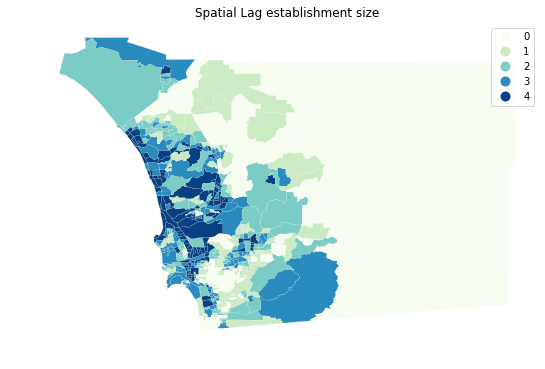

In [70]:

f, ax = plt.subplots(1, figsize=(9, 9))
gdf.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag establishment size")

plt.show()

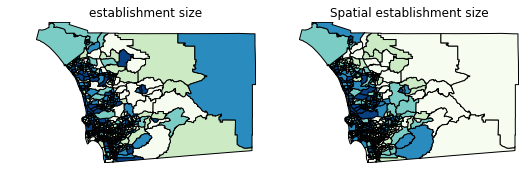

In [71]:
gdf['lag_est'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
gdf.plot(column='EstablishmentS', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(gdf.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("establishment size")


gdf.plot(column='lag_est', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(gdf.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial establishment size")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [72]:

y.median()

33.0362930452397

In [73]:

yb = y > y.median()
sum(yb)

313

In [74]:

yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
gdf['yb'] = yb

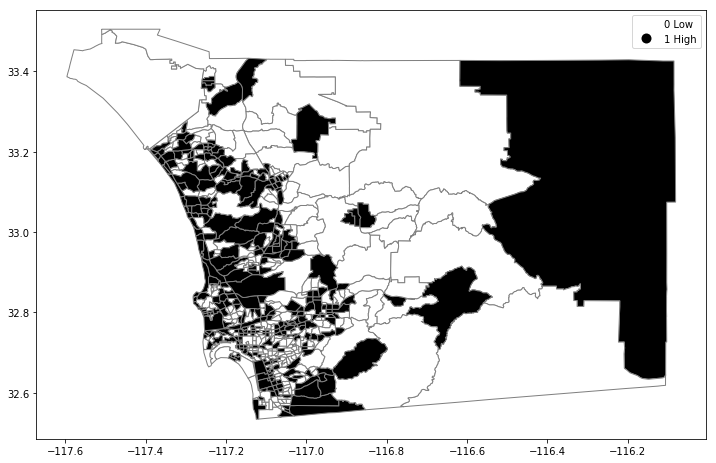

In [75]:

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gdf.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [76]:
import esda
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(gdf)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [77]:

jc.bb

585

In [78]:

jc.ww

545

In [79]:
jc.bw

845

In [80]:
jc.bb + jc.ww + jc.bw

1975

In [81]:
wq.s0 / 2

1975.0

In [82]:
jc.bb

585

In [83]:
jc.mean_bb

490

Text(0.5, 0, 'BB Counts')

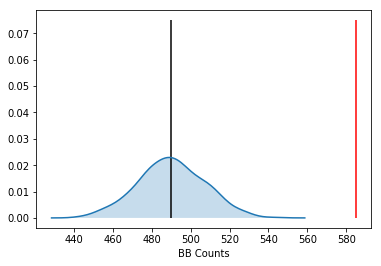

In [84]:
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

In [85]:
jc.p_sim_bb

0.001

In [86]:

wq.transform = 'r'

In [87]:
y = gdf['EstablishmentS']

In [88]:

np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.1202040019869667

In [89]:
#Again, our value for the statistic needs to be interpreted against a reference distribution under the null of CSR. PySAL uses a similar approach as we saw in the join count analysis: random spatial permutations.

Text(0.5, 0, "Moran's I")

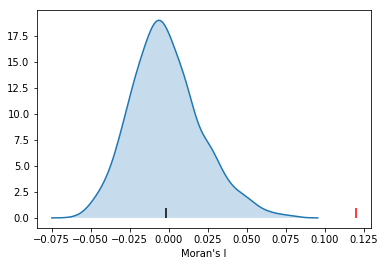

In [90]:

sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [91]:
mi.p_sim

0.001

In [92]:
lag_price = lps.weights.lag_spatial(wq, gdf['EstablishmentS'])

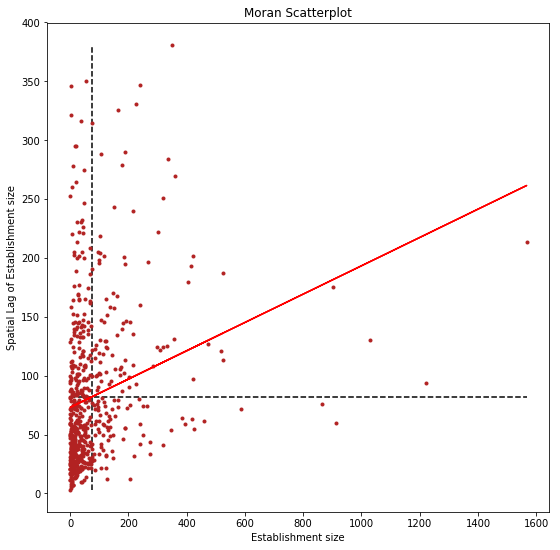

In [94]:
price = gdf['EstablishmentS']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Establishment size')
plt.xlabel('Establishment size')
plt.show()

In [95]:

li = esda.moran.Moran_Local(y, wq)

In [96]:
(li.p_sim < 0.05).sum()

111

In [97]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [98]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

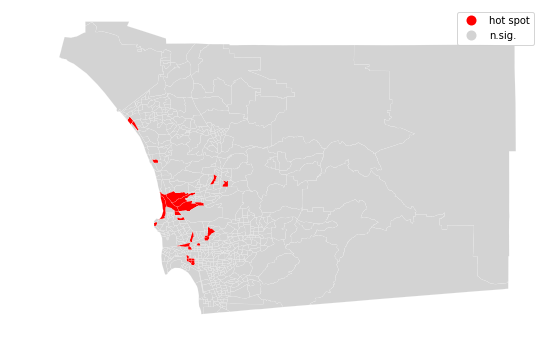

In [99]:
df = gdf
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [100]:

spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

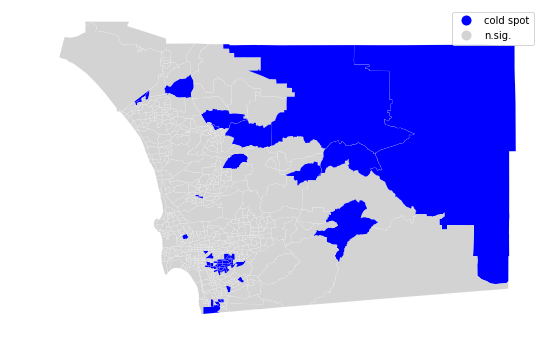

In [101]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [102]:

spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

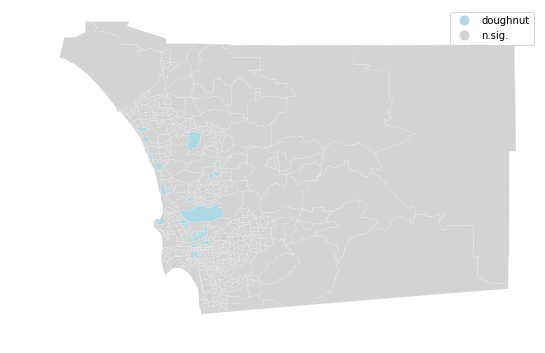

In [103]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [104]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

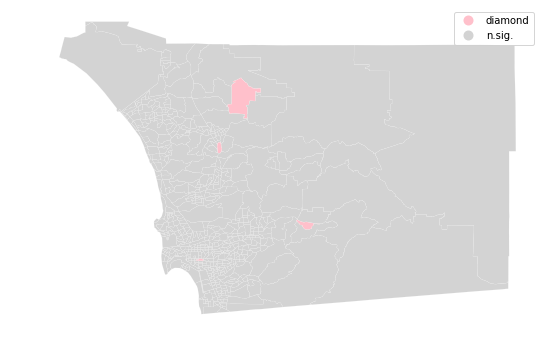

In [105]:

df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [106]:

sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 3, 0, 0, 3, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       3, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [107]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

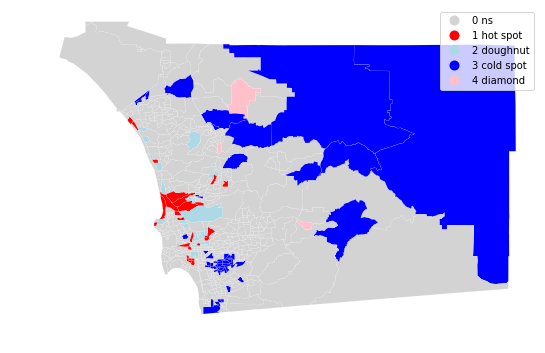

In [108]:

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()